# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

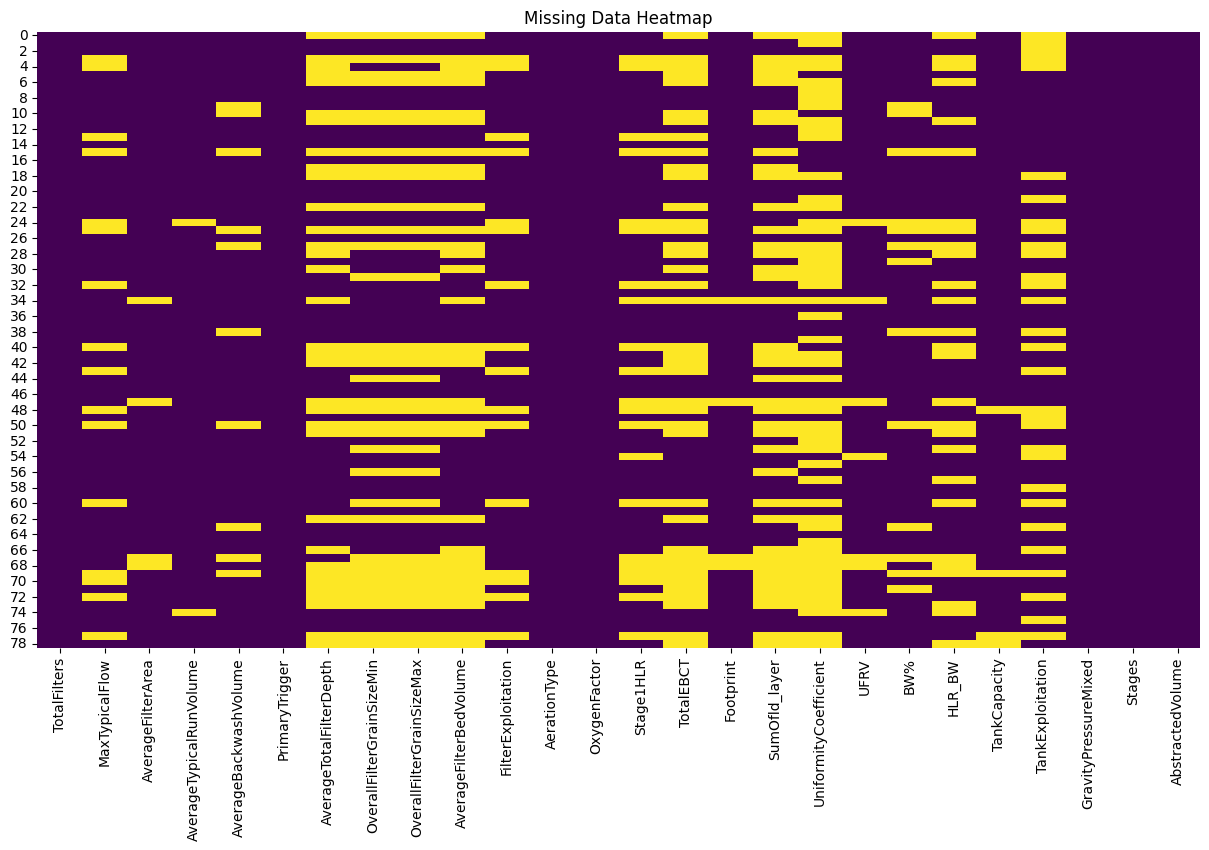

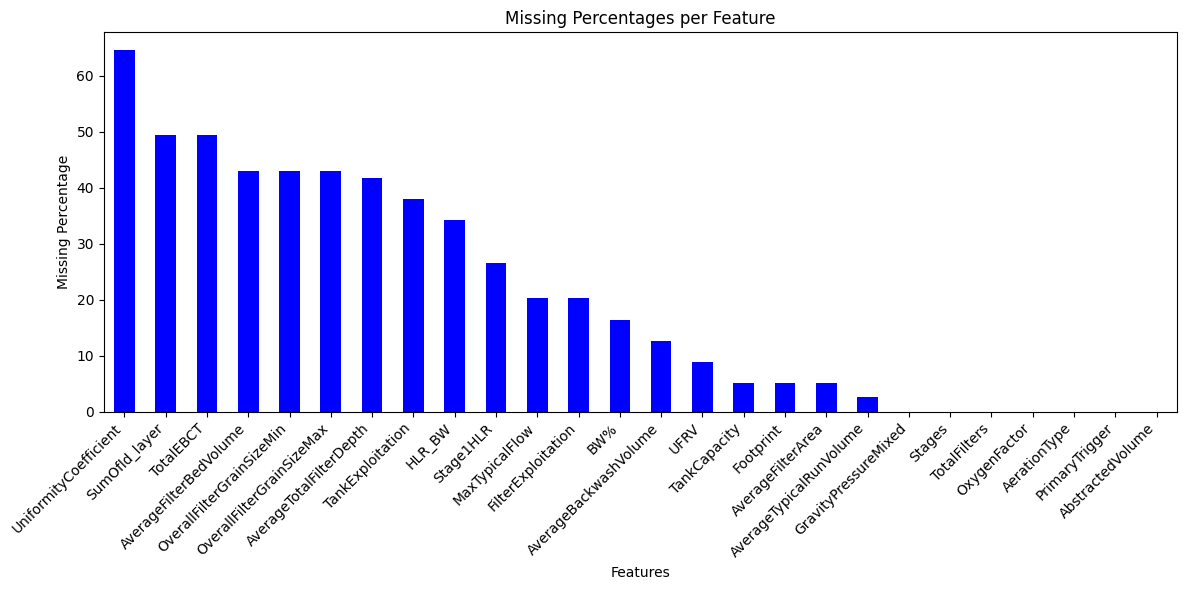

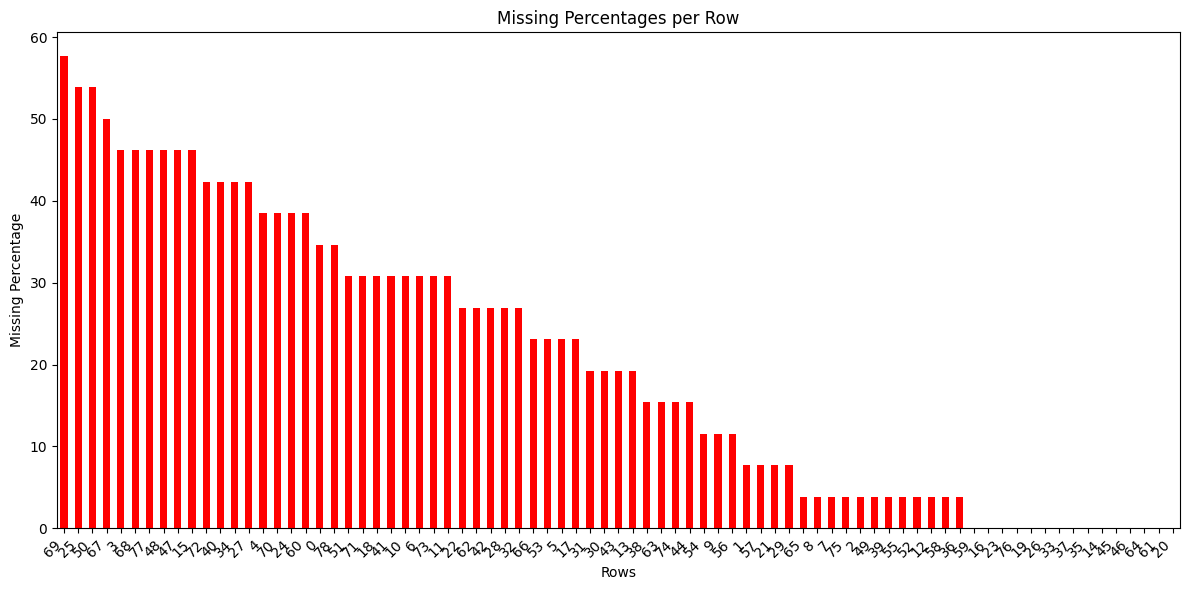

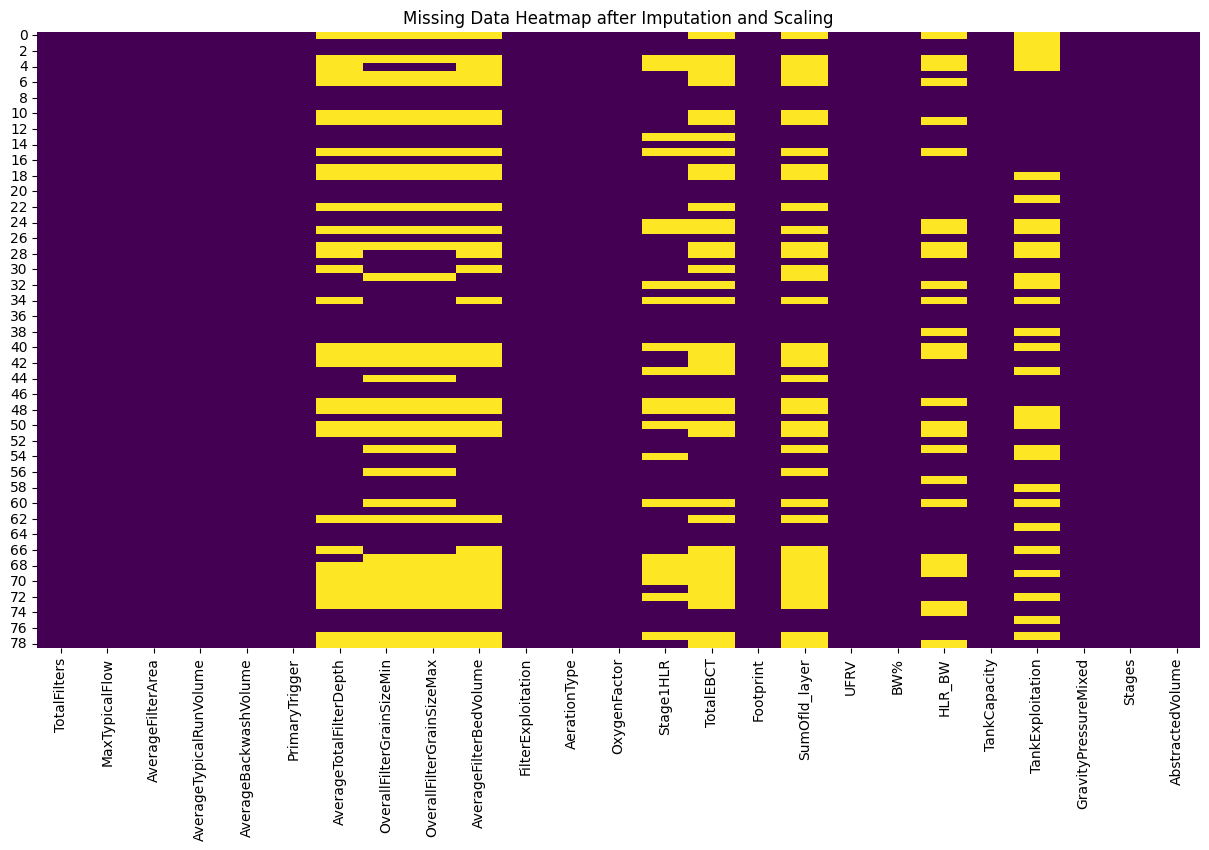

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler



# Read the dataset
df = pd.read_excel(r"merkur.xlsx")

# Drop the names column
df = df.drop(columns='WaterworksName')

# Show heatmap of missing values
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Calculate the percentage of missing values per feature
missing_percentages_per_feature = df.isnull().mean().round(4) * 100

# Create a bar graph for missing percentages per feature
plt.figure(figsize=(12, 6))
missing_percentages_per_feature.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Missing Percentages per Feature')
plt.xlabel('Features')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate the percentage of missing values per row
missing_percentages_per_row = df.isnull().mean(axis=1).round(4) * 100

# Create a bar graph for missing percentages per row
plt.figure(figsize=(12, 6))
missing_percentages_per_row.sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Missing Percentages per Row')
plt.xlabel('Rows')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# # It seems that UniformityCoefficient has more than 64% missing values, so we will drop it
# Drop columns with more than 50% missing values
df = df.drop(columns=missing_percentages_per_feature[missing_percentages_per_feature > 50].index)

# Scale numerical features using Standard Scaling
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Impute missing values for the features with less than 25% missing values using simple imputer
impute_threshold = 25
features_to_impute = missing_percentages_per_feature[missing_percentages_per_feature < impute_threshold].index
features_to_impute = features_to_impute[missing_percentages_per_feature[features_to_impute] > 0]
imputer = SimpleImputer(strategy='mean')
df[features_to_impute] = imputer.fit_transform(df[features_to_impute])



# Show heatmap of missing values after imputation and scaling
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap after Imputation and Scaling')
plt.show()





### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.